In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pydotplus
from sklearn import tree
from IPython.display import Image


testCSV = 'https://raw.githubusercontent.com/andybbruno/DataMining/master/new_test_cleaned.csv?token=AGWKQXZ3CGK7FSO5Y7QZFTS6DCHQK'
trainCSV = 'https://raw.githubusercontent.com/andybbruno/DataMining/master/new_train_cleaned.csv?token=AGWKQXZ5YDIRGB6HOYWHTPC6DCHQQ'

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


################## DECISION TREE ##################
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     12829
           1       0.85      0.21      0.34      1768

    accuracy                           0.90     14597
   macro avg       0.87      0.60      0.64     14597
weighted avg       0.90      0.90      0.87     14597

VehYear 0.0
Make 0.0
Model 0.0
SubModel 0.0
Color 0.0
Transmission 0.0
Nationality 0.0
PurchYear 0.0
PurchDay 0.0
EngineLiters 0.0
NumCylinders 0.0
4X4 0.0
WheelDrive 0.0
NumDoors 0.0
PCA1 0.0
PCA2 0.0
PurchMonth 0.001055974878610934
Trim 0.0024139037301354103
WarrantyCost 0.005541626912277765
PurchWeekDay 0.006712275215033286
PurchDate 0.014103062701981608
VehOdo 0.01586465446181796
BYRNO 0.019488177298225617
VNST 0.025981447426784578
VehicleAge 0.03327592513429708
VehBCost 0.06696480555423316
Auction 0.09520927080285396
WheelType 0.7133888758837487


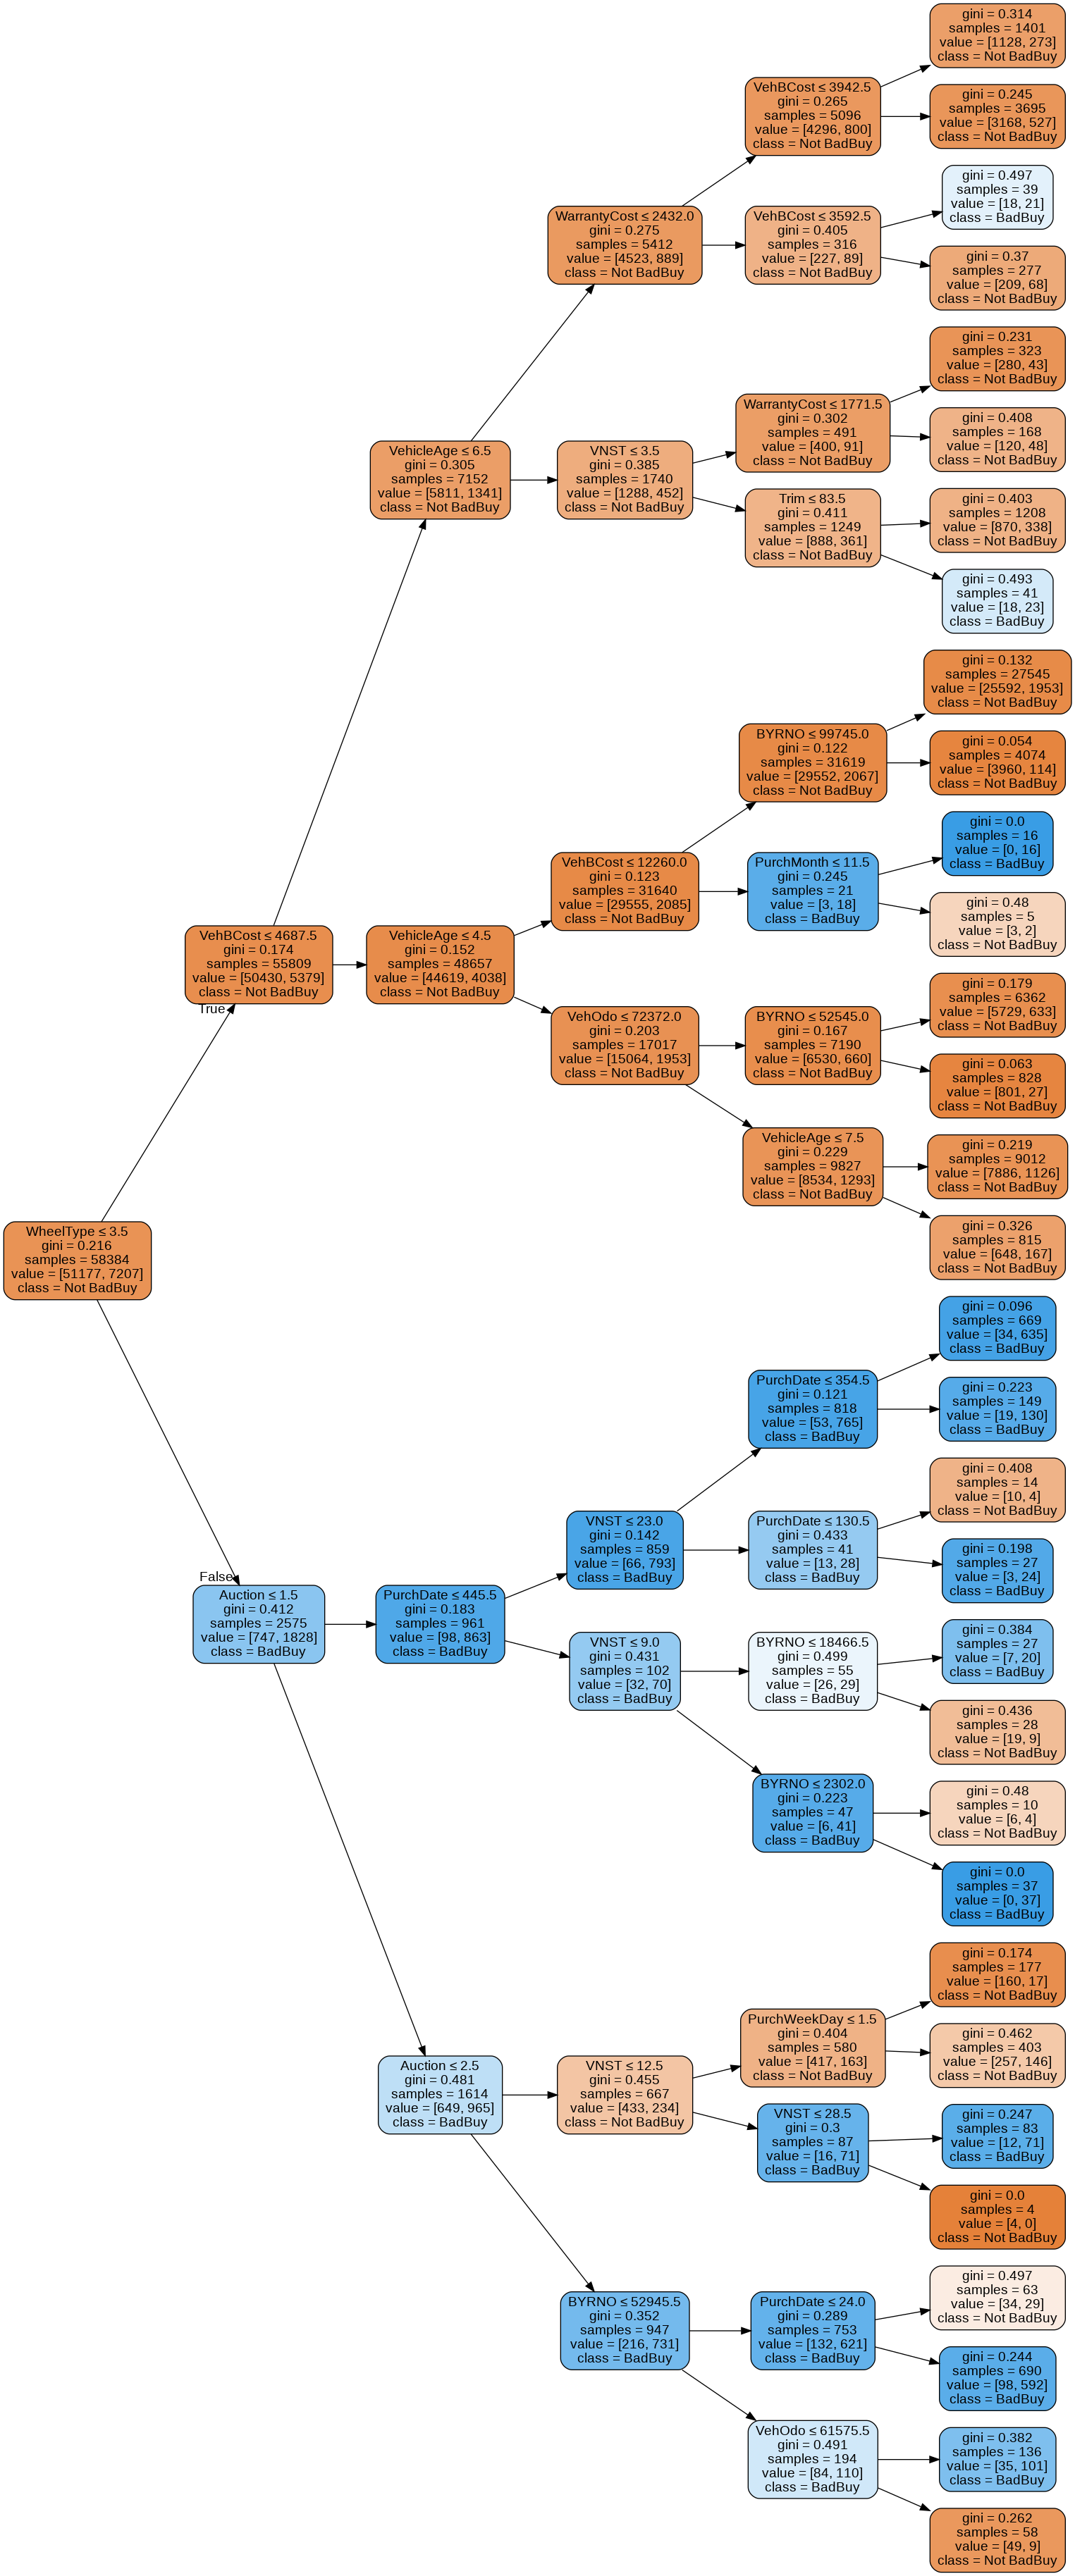

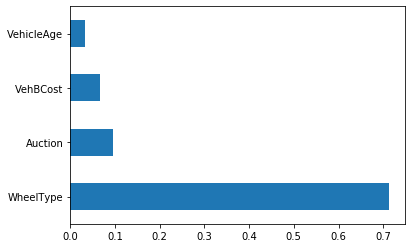

In [3]:
print("################## DECISION TREE ##################")
# READ TRAINING
df = pd.read_csv(trainCSV)
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(columns=['RefId'], axis=1, inplace=True)

y_train = df['IsBadBuy']
X_train = df.drop(columns=['IsBadBuy'])

# READ TEST
df = pd.read_csv(testCSV)
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(columns=['RefId'], axis=1, inplace=True)

y_test = df['IsBadBuy']
X_test = df.drop(columns=['IsBadBuy'])


clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

attributes = [col for col in df.columns if col != 'IsBadBuy']

zipped = zip(attributes, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1])

for col, imp in zipped:
    print(col, imp)

feat_importances = pd.Series(clf.feature_importances_, index=attributes)
feat_importances.nlargest(4).plot(kind='barh')

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=['BadBuy' if x == 1 else 'Not BadBuy' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                rotate=True,
                                max_depth=5)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

################## DECISION TREE + OVERSAMPLING ##################
              precision    recall  f1-score   support

           0       0.92      0.75      0.83     12829
           1       0.23      0.54      0.32      1768

    accuracy                           0.72     14597
   macro avg       0.58      0.64      0.57     14597
weighted avg       0.84      0.72      0.77     14597

PurchDate 0.0
Auction 0.0
VehYear 0.0
VehicleAge 0.0
Make 0.0
Model 0.0
Trim 0.0
SubModel 0.0
Color 0.0
Transmission 0.0
VehOdo 0.0
Nationality 0.0
BYRNO 0.0
VNST 0.0
WarrantyCost 0.0
PurchYear 0.0
PurchMonth 0.0
PurchDay 0.0
EngineLiters 0.0
NumCylinders 0.0
4X4 0.0
WheelDrive 0.0
NumDoors 0.0
PCA1 0.0
PCA2 0.0
PurchWeekDay 0.0077409196250432235
VehBCost 0.18136357137006162
WheelType 0.810895509004895


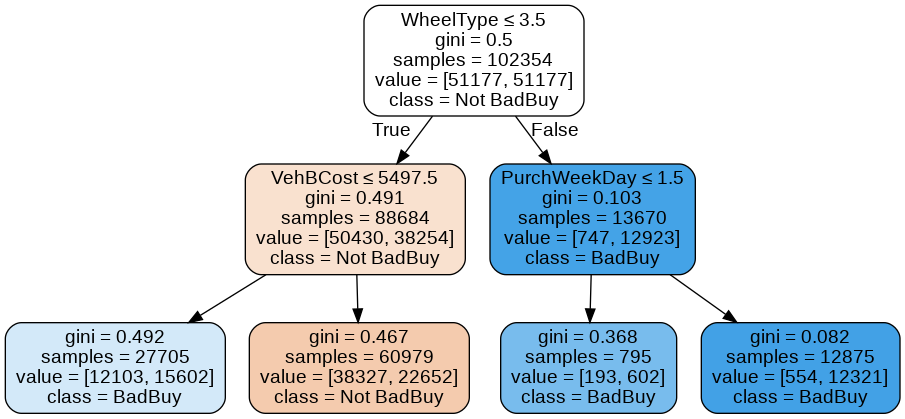

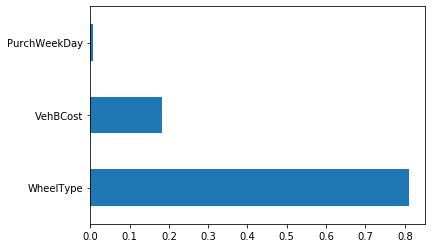

In [0]:
print("################## DECISION TREE + OVERSAMPLING ##################")
# READ TRAINING
df = pd.read_csv(trainCSV)
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(columns=['RefId'], axis=1, inplace=True)

y_train = df['IsBadBuy']
X_train = df.drop(columns=['IsBadBuy'])
X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)


# READ TEST
df = pd.read_csv(testCSV)
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(columns=['RefId'], axis=1, inplace=True)

y_test = df['IsBadBuy']
X_test = df.drop(columns=['IsBadBuy'])


clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_split=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

attributes = [col for col in df.columns if col != 'IsBadBuy']

zipped = zip(attributes, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1])

for col, imp in zipped:
    print(col, imp)

feat_importances = pd.Series(clf.feature_importances_, index=attributes)
feat_importances.nlargest(3).plot(kind='barh')

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=['BadBuy' if x == 1 else 'Not BadBuy' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

################## DECISION TREE + UNDERSAMPLING ##################
              precision    recall  f1-score   support

           0       0.92      0.66      0.77     12829
           1       0.20      0.60      0.30      1768

    accuracy                           0.66     14597
   macro avg       0.56      0.63      0.54     14597
weighted avg       0.84      0.66      0.72     14597

PurchDate 0.0
VehYear 0.0
Trim 0.0
SubModel 0.0
Color 0.0
Nationality 0.0
PurchYear 0.0
PurchMonth 0.0
PurchDay 0.0
NumCylinders 0.0
WheelDrive 0.0
PCA1 0.0
NumDoors 0.0002166805191880991
Transmission 0.000905833718910353
Model 0.0012083079097379205
Make 0.0012187061959371486
EngineLiters 0.001244376802565921
WarrantyCost 0.00274628204466336
Auction 0.004786815499338155
4X4 0.005476347947729654
PurchWeekDay 0.005646623697429966
PCA2 0.008317837099525296
VNST 0.02041242626279631
VehOdo 0.030424429767360026
BYRNO 0.03561771767902878
VehicleAge 0.07125410210820846
VehBCost 0.18600992220309034
WheelTyp

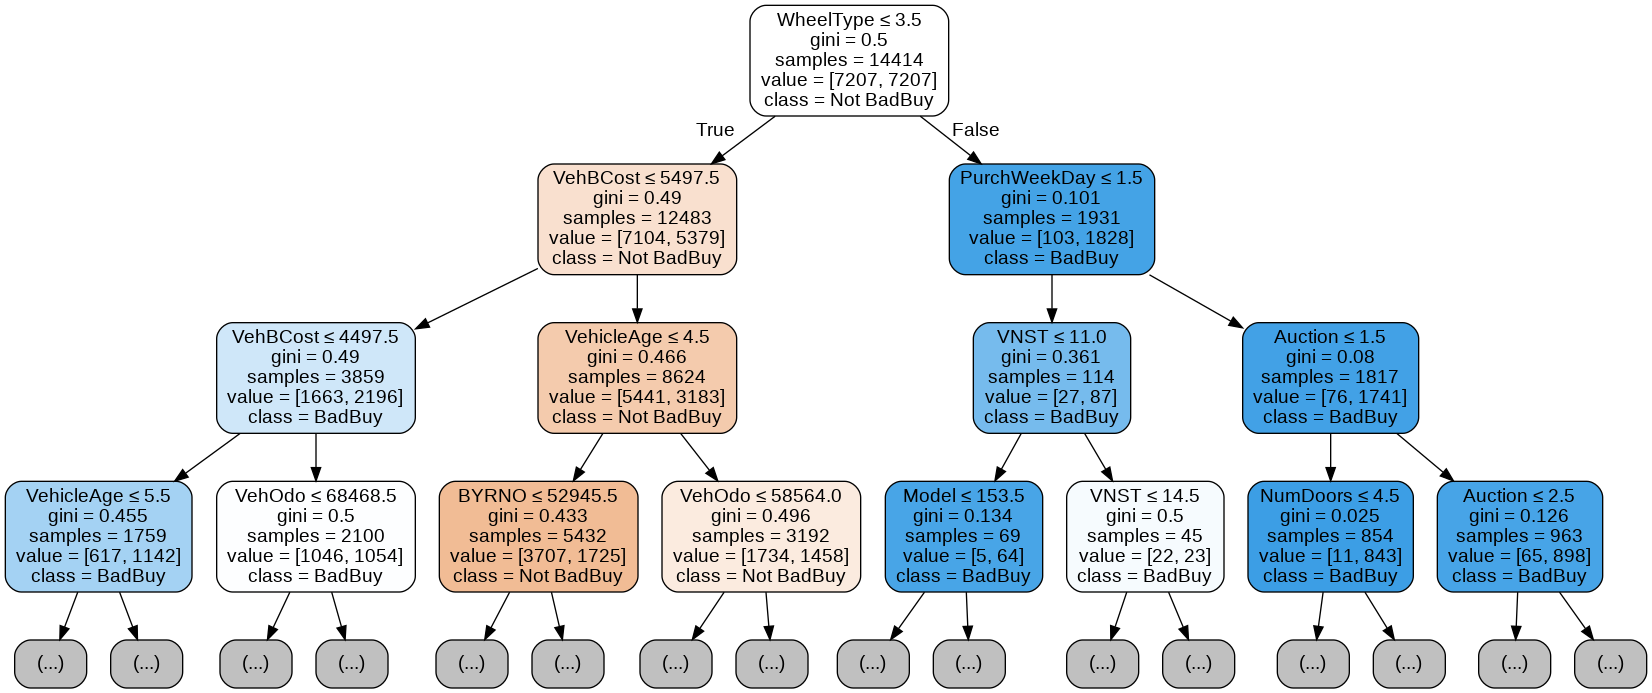

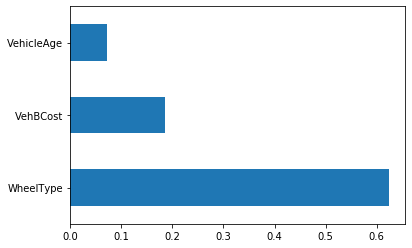

In [0]:
print("################## DECISION TREE + UNDERSAMPLING ##################")
# READ TRAINING
df = pd.read_csv(trainCSV)
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(columns=['RefId'], axis=1, inplace=True)

y_train = df['IsBadBuy']
X_train = df.drop(columns=['IsBadBuy'])
X_train, y_train = RandomUnderSampler().fit_resample(X_train, y_train)


# READ TEST
df = pd.read_csv(testCSV)
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(columns=['RefId'], axis=1, inplace=True)

y_test = df['IsBadBuy']
X_test = df.drop(columns=['IsBadBuy'])


clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=20)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

attributes = [col for col in df.columns if col != 'IsBadBuy']

zipped = zip(attributes, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1])

for col, imp in zipped:
    print(col, imp)

feat_importances = pd.Series(clf.feature_importances_, index=attributes)
feat_importances.nlargest(3).plot(kind='barh')

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=['BadBuy' if x == 1 else 'Not BadBuy' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=3)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())